In [118]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import numpy as np
import seaborn as sns
import  scipy
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from torch.utils.data import DataLoader, TensorDataset
import tqdm
import os

In [119]:
%cd "D:\desk top folders\ML\MachineLearning2024W\mid\src"

d:\desk top folders\ML\MachineLearning2024W\mid\src


In [140]:
data = loadmat("DATA.mat")
print(data.keys(),"\n")


dict_keys(['__header__', '__version__', '__globals__', 'NOV17', 'NOV9']) 



In [141]:
data_nov9 = data["NOV9"]
print(data_nov9.shape)
data_nov17 = data["NOV17"]
print(data_nov17.shape)

(86400, 17)
(86400, 17)


In [142]:
fault_range_nov9 = {"f16":(57275, 57550), "f18_1":(58830,58930), "f18_2" : (58520, 58625)}
fault_range_nov17 = {"f16":(56670, 56770), "f18":(54600,54700)}


In [143]:
label_nov9 = np.zeros(data_nov9.shape[0], dtype=int)

for key, (start, end) in fault_range_nov9.items():
    if key == "f16":
        label_nov9[start:end + 1] = 1
    else:
        label_nov9[start:end + 1] = 2

        

label_nov17 = np.zeros(data_nov17.shape[0], dtype=int)

# Set the values to 1 for the specified ranges
for key, (start, end) in fault_range_nov9.items():
    if key == "f16":
        label_nov17[start:end + 1] = 1
    else:
        label_nov17[start:end + 1] = 2

In [144]:
data_nov9.shape , label_nov9.shape

((86400, 17), (86400,))

In [145]:
data_nov9 = data_nov9[57275:59000,:]
label_nov9 = label_nov9[57275:59000]

In [146]:
data_nov9.shape , label_nov9.shape

((1725, 17), (1725,))

In [147]:
import numpy as np

# Define the feature extraction function
def feature_extraction(data):
    # Initialize a list to collect features
    features = []

    # Standard Deviation
    features.append(np.std(data, axis=1))

    # Peak
    features.append(np.max(np.abs(data), axis=1))

    # Crest Factor (peak divided by RMS)
    rms = np.sqrt(np.mean(np.square(data), axis=1))
    features.append(features[1] / rms)

    # Clearance Factor (peak divided by the mean of the square root of the absolute values)
    features.append(features[1] / np.mean(np.sqrt(np.abs(data)), axis=1))

    # Peak to Peak
    features.append(np.ptp(data, axis=1))

    # Shape Factor (RMS divided by the mean of the absolute values)
    features.append(rms / np.mean(np.abs(data), axis=1))

    # Impact Factor (peak divided by mean)
    features.append(features[1] / np.mean(data, axis=1))

    # Square Mean Root (the square root of the mean of the squares)
    features.append(rms)

    # Mean
    features.append(np.mean(data, axis=1))

    # Convert the list of features to a numpy array and flatten it
    return np.array(features)



In [148]:
features9 = np.transpose(feature_extraction(data_nov9))
features17 = np.transpose(feature_extraction(data_nov17))
features9.shape , features17.shape

((1725, 9), (86400, 9))

In [149]:
# features9 = np.concatenate((features9,label_nov9.reshape(-1, 1)),axis = 1)
# features17 = np.concatenate((features17,label_nov17.reshape(-1, 1)),axis = 1)
# print(features9.shape)
# print(features17.shape)


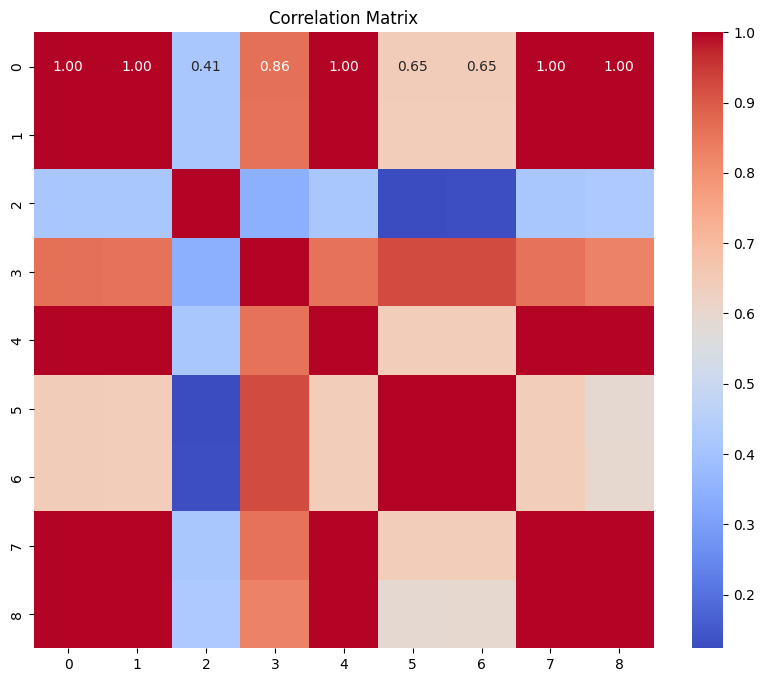

In [150]:
dataa = pd.DataFrame(features9)

correlation_matrix = dataa.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Using device: cuda
Epoch 1/300, Train Loss: 0.6297, Val Loss: 0.6121, acc: 0.1804
Epoch 2/300, Train Loss: 0.6143, Val Loss: 0.5962, acc: 0.1804
Epoch 3/300, Train Loss: 0.5992, Val Loss: 0.5807, acc: 0.1804
Epoch 4/300, Train Loss: 0.5845, Val Loss: 0.5657, acc: 0.1804
Epoch 5/300, Train Loss: 0.5703, Val Loss: 0.5511, acc: 0.1804


c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 6/300, Train Loss: 0.5565, Val Loss: 0.5369, acc: 0.1804
Epoch 7/300, Train Loss: 0.5431, Val Loss: 0.5233, acc: 0.1804
Epoch 8/300, Train Loss: 0.5301, Val Loss: 0.5101, acc: 0.1804
Epoch 9/300, Train Loss: 0.5175, Val Loss: 0.4972, acc: 0.1884
Epoch 10/300, Train Loss: 0.5052, Val Loss: 0.4847, acc: 0.1949
Epoch 11/300, Train Loss: 0.4932, Val Loss: 0.4724, acc: 0.1964
Epoch 12/300, Train Loss: 0.4814, Val Loss: 0.4605, acc: 0.2000
Epoch 13/300, Train Loss: 0.4700, Val Loss: 0.4489, acc: 0.2022
Epoch 14/300, Train Loss: 0.4587, Val Loss: 0.4376, acc: 0.2036
Epoch 15/300, Train Loss: 0.4477, Val Loss: 0.4265, acc: 0.2058
Epoch 16/300, Train Loss: 0.4369, Val Loss: 0.4158, acc: 0.2058
Epoch 17/300, Train Loss: 0.4263, Val Loss: 0.4052, acc: 0.2051
Epoch 18/300, Train Loss: 0.4158, Val Loss: 0.3949, acc: 0.2072
Epoch 19/300, Train Loss: 0.4054, Val Loss: 0.3848, acc: 0.2072
Epoch 20/300, Train Loss: 0.3952, Val Loss: 0.3747, acc: 0.2080
Epoch 21/300, Train Loss: 0.3849, Val Loss: 

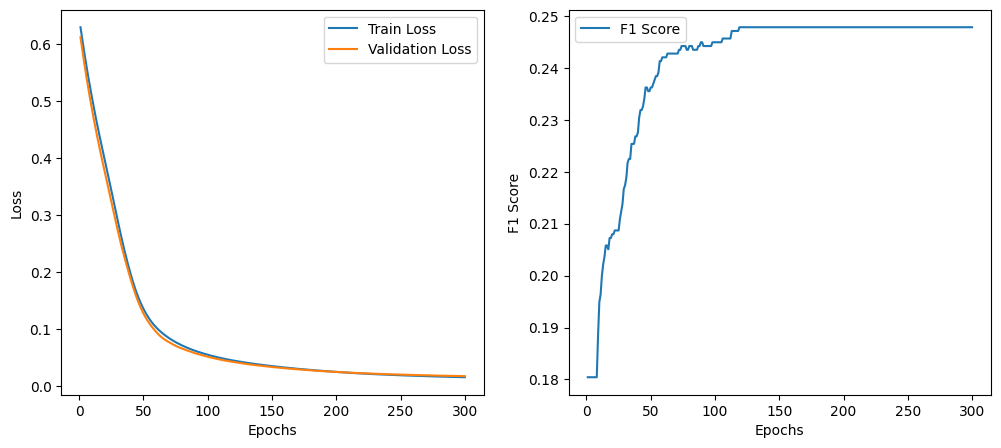

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming features9 is a numpy array with shape (n_samples, 10)
# features9[:, :-1] are the sensor data, features9[:, -1] are the labels

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Split features and labels for the dataset
X = features9
y = label_nov9

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the labels
one_hot_encoder = OneHotEncoder(sparse=False)
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=10000, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2*hidden_dim)
        self.fc3 = nn.Linear(2*hidden_dim, output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

input_dim = X.shape[1]
hidden_dim = 64
output_dim = y_one_hot.shape[1]  # Number of classes
model = MLP(input_dim, hidden_dim, output_dim).to(device)

# Define the optimizer, loss function, and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

# Training loop with early stopping
num_epochs = 300
early_stopping_patience = 10
best_val_loss = float('inf')
patience_counter = 0

train_losses = []
val_losses = []
f1_scores = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    val_loss = 0
    correct_predictions = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            y_true= torch.argmax(y_batch, dim=1).cpu().numpy()
            y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
            correct_predictions += (y_pred == y_true).sum().item()
    
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)
    
    f1 = correct_predictions/len(X_train)
    f1_scores.append(f1)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, acc: {f1:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(best_model_state)

# Plotting the train/validation loss and F1 score
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, f1_scores, label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.show()

# Evaluation on the feature17 dataset


In [ ]:
!gdown 18IkUJW_oNSmzfMIiRoiyi624r76jp6d6

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2*hidden_dim)
        self.fc3 = nn.Linear(2*hidden_dim, output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

input_dim = 9
hidden_dim = 64
output_dim = 3  # Number of classes
model = MLP(input_dim, hidden_dim, output_dim).to(device)

model.load_state_dict(torch.load('best_model.pth'))

c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.45      0.62     85917
     Class 1       0.01      1.00      0.01       276
     Class 2       0.00      0.00      0.00       207

    accuracy                           0.45     86400
   macro avg       0.33      0.48      0.21     86400
weighted avg       0.99      0.45      0.62     86400



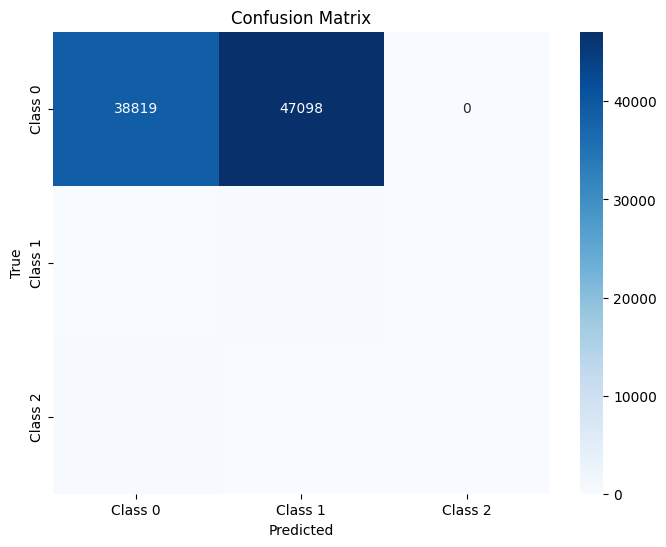

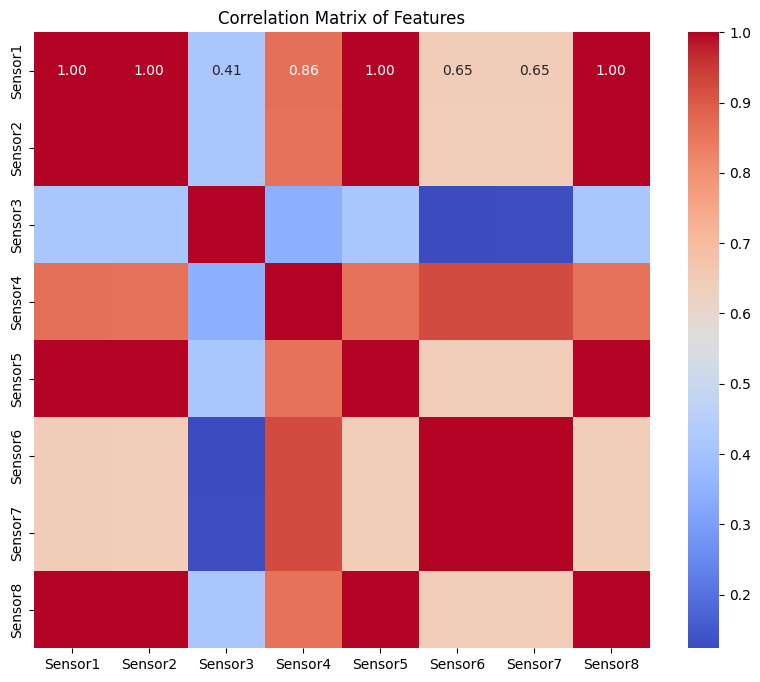

In [152]:
X_eval = features17
y_eval = label_nov17.astype(int)
X_eval = scaler.transform(X_eval)

# One-hot encode the labels for the evaluation set
y_eval_one_hot = one_hot_encoder.transform(y_eval.reshape(-1, 1))

X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32).to(device)
y_eval_tensor = torch.tensor(y_eval_one_hot, dtype=torch.float32).to(device)

model.eval()
y_eval_true = []
y_eval_pred = []
with torch.no_grad():
    outputs = model(X_eval_tensor)
    y_eval_pred.append(torch.argmax(outputs, dim=1).cpu().numpy())
    y_eval_true.append(torch.argmax(y_eval_tensor, dim=1).cpu().numpy())

y_eval_pred = np.array(y_eval_pred).reshape(-1,1)
y_eval_true = np.array(y_eval_true).reshape(-1,1)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_eval_true, y_eval_pred)
class_report = classification_report(y_eval_true, y_eval_pred, target_names=['Class 0', 'Class 1', 'Class 2'])

print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the correlation matrix of features
feature_names = [f'Sensor{i+1}' for i in range(features9.shape[1] - 1)] + ['Label']
df_features = pd.DataFrame(features9, columns=feature_names)
correlation_matrix = df_features.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Features')
plt.show()
